# Unlocking the Future: Predicting Real Estate Market Trends with Time Series Analysis 

# INTRODUTION




## 1.1 Business Understanding

This project serves as a consulting opportunity for a fictional real estate investment firm, emphasizing the application of time series analysis. Their core objective is to leverage Zillow Research data for predicting property price trends in diverse zip codes. By harnessing the power of data-driven insights, the firm seeks to enhance investment decision-making, reduce risks, and gain a competitive advantage in the real estate sector. Time series modeling will be instrumental in guiding them toward profitable, compliant, and strategic investments aligned with their long-term goals.

## 1.2 Problem Statement

## 1.3 Objectives









### 1.3.1 Main Objective

The primary aim of this project to leverage time series modeling to provide the real-estate investment firm with actionable insights and forecasts pertaining to real estate price dynamics in various zip codes. These time-driven analyses will enable the firm to make informed investment decisions, uncover potential opportunities, and proactively address risks within the ever-changing landscape of the real estate market.

### 1.3.2 Specific Objectives

- Choose and train appropriate time series forecasting models for real estate price data in 
  zip  codes.
- Evaluate the potential risks associated with investing in various zip codes based on forecasted real 
  estate price trends, and develop strategies to mitigate these risks.  
- Provide tailored investment recommendations for each zip code, including which areas present promising
  opportunities, which ones require caution, and strategies for optimizing the real estate investment portfolio.  

## 1.4 Data Understanding

In this project, we have utilized a dataset sourced from various states within the United States, capturing historical median house prices spanning a 22-year period, ranging from April 1996 to April 2018. This comprehensive dataset was acquired from the Zillow website.

The dataset comprises 14,723 rows and boasts a substantial 272 columns.

Within these 272 columns, four are of a categorical nature, while the remainder are numerical. Here's an overview of the key columns:

  - RegionID: This is a unique identifier for each region.
  - RegionName: Corresponds to the names of regions, typically representing zip codes.
  - City: Provides the city names associated with the respective regions.
  - State: Indicates the states in which these regions are located.
  - Metro: Identifies the metropolitan areas to which these regions belong.
  - County Name: Specifies the names of the counties where these regions are situated.
  - Size Rank: Represents the rank of zip codes based on their level of urbanization.
  - Date Columns (265 Columns): These encompass a vast array of columns that are likely to 
    contain    median house prices over the 22-year duration, providing a detailed historical perspective."

# 2. LOADING LIBRARIES

In [1]:
#Importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose

import warnings
warnings.filterwarnings('ignore')


## 3.DATA COLLECTION

In [2]:
#Loading the zillow dataset
df = pd.read_csv('zillow_data.csv')
df.head()

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
0,84654,60657,Chicago,IL,Chicago,Cook,1,334200.0,335400.0,336500.0,...,1005500,1007500,1007800,1009600,1013300,1018700,1024400,1030700,1033800,1030600
1,90668,75070,McKinney,TX,Dallas-Fort Worth,Collin,2,235700.0,236900.0,236700.0,...,308000,310000,312500,314100,315000,316600,318100,319600,321100,321800
2,91982,77494,Katy,TX,Houston,Harris,3,210400.0,212200.0,212200.0,...,321000,320600,320200,320400,320800,321200,321200,323000,326900,329900
3,84616,60614,Chicago,IL,Chicago,Cook,4,498100.0,500900.0,503100.0,...,1289800,1287700,1287400,1291500,1296600,1299000,1302700,1306400,1308500,1307000
4,93144,79936,El Paso,TX,El Paso,El Paso,5,77300.0,77300.0,77300.0,...,119100,119400,120000,120300,120300,120300,120300,120500,121000,121500


In [3]:
#Displaying the first 5 rows
df.head()

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
0,84654,60657,Chicago,IL,Chicago,Cook,1,334200.0,335400.0,336500.0,...,1005500,1007500,1007800,1009600,1013300,1018700,1024400,1030700,1033800,1030600
1,90668,75070,McKinney,TX,Dallas-Fort Worth,Collin,2,235700.0,236900.0,236700.0,...,308000,310000,312500,314100,315000,316600,318100,319600,321100,321800
2,91982,77494,Katy,TX,Houston,Harris,3,210400.0,212200.0,212200.0,...,321000,320600,320200,320400,320800,321200,321200,323000,326900,329900
3,84616,60614,Chicago,IL,Chicago,Cook,4,498100.0,500900.0,503100.0,...,1289800,1287700,1287400,1291500,1296600,1299000,1302700,1306400,1308500,1307000
4,93144,79936,El Paso,TX,El Paso,El Paso,5,77300.0,77300.0,77300.0,...,119100,119400,120000,120300,120300,120300,120300,120500,121000,121500


In [4]:
#Displaying the last 5 rows
df.tail()

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
14718,58333,1338,Ashfield,MA,Greenfield Town,Franklin,14719,94600.0,94300.0,94000.0,...,216800,217700,218600,218500,218100,216400,213100,209800,209200,209300
14719,59107,3293,Woodstock,NH,Claremont,Grafton,14720,92700.0,92500.0,92400.0,...,202100,208400,212200,215200,214300,213100,213700,218300,222700,225800
14720,75672,40404,Berea,KY,Richmond,Madison,14721,57100.0,57300.0,57500.0,...,121800,122800,124600,126700,128800,130600,131700,132500,133000,133400
14721,93733,81225,Mount Crested Butte,CO,NaN,Gunnison,14722,191100.0,192400.0,193700.0,...,662800,671200,682400,695600,695500,694700,706400,705300,681500,664400
14722,95851,89155,Mesquite,NV,Las Vegas,Clark,14723,176400.0,176300.0,176100.0,...,333800,336400,339700,343800,346800,348900,350400,353000,356000,357200


In [5]:
#Displaying the summary of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14723 entries, 0 to 14722
Columns: 272 entries, RegionID to 2018-04
dtypes: float64(219), int64(49), object(4)
memory usage: 30.6+ MB


In [6]:
#Displaying the numeric summary of the dataset
df.describe()

,RegionID,RegionName,SizeRank,1996-04,1996-05,1996-06,1996-07,1996-08,1996-09,1996-10,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
count,14723.000000,14723.000000,14723.000000,1.368400e+04,1.368400e+04,1.368400e+04,1.368400e+04,1.368400e+04,1.368400e+04,1.368400e+04,...,1.472300e+04,1.472300e+04,1.472300e+04,1.472300e+04,1.472300e+04,1.472300e+04,1.472300e+04,1.472300e+04,1.472300e+04,1.472300e+04
mean,81075.010052,48222.348706,7362.000000,1.182991e+05,1.184190e+05,1.185374e+05,1.186531e+05,1.187803e+05,1.189275e+05,1.191205e+05,...,2.733354e+05,2.748658e+05,2.764646e+05,2.780332e+05,2.795209e+05,2.810953e+05,2.826571e+05,2.843687e+05,2.865114e+05,2.880399e+05
std,31934.118525,29359.325439,4250.308342,8.600251e+04,8.615567e+04,8.630923e+04,8.646795e+04,8.665094e+04,8.687208e+04,8.715185e+04,...,3.603984e+05,3.614678e+05,3.627563e+05,3.644610e+05,3.656003e+05,3.670454e+05,3.695727e+05,3.717739e+05,3.724612e+05,3.720544e+05
min,58196.000000,1001.000000,1.000000,1.130000e+04,1.150000e+04,1.160000e+04,1.180000e+04,1.180000e+04,1.200000e+04,1.210000e+04,...,1.440000e+04,1.450000e+04,1.470000e+04,1.480000e+04,1.450000e+04,1.430000e+04,1.410000e+04,1.390000e+04,1.380000e+04,1.380000e+04
25%,67174.500000,22101.500000,3681.500000,6.880000e+04,6.890000e+04,6.910000e+04,6.920000e+04,6.937500e+04,6.950000e+04,6.960000e+04,...,1.269000e+05,1.275000e+05,1.282000e+05,1.287000e+05,1.292500e+05,1.299000e+05,1.306000e+05,1.310500e+05,1.319500e+05,1.324000e+05
50%,78007.000000,46106.000000,7362.000000,9.950000e+04,9.950000e+04,9.970000e+04,9.970000e+04,9.980000e+04,9.990000e+04,9.995000e+04,...,1.884000e+05,1.896000e+05,1.905000e+05,1.914000e+05,1.925000e+05,1.934000e+05,1.941000e+05,1.950000e+05,1.967000e+05,1.981000e+05
75%,90920.500000,75205.500000,11042.500000,1.432000e+05,1.433000e+05,1.432250e+05,1.432250e+05,1.435000e+05,1.437000e+05,1.439000e+05,...,3.050000e+05,3.066500e+05,3.085000e+05,3.098000e+05,3.117000e+05,3.134000e+05,3.151000e+05,3.168500e+05,3.188500e+05,3.211000e+05
max,753844.000000,99901.000000,14723.000000,3.676700e+06,3.704200e+06,3.729600e+06,3.754600e+06,3.781800e+06,3.813500e+06,3.849600e+06,...,1.888990e+07,1.870350e+07,1.860530e+07,1.856940e+07,1.842880e+07,1.830710e+07,1.836590e+07,1.853040e+07,1.833770e+07,1.789490e+07


In [7]:
df.shape

(14723, 272)

The dataset above has both numerical and categorical variables. It has 14723 rows and 272 columns.

## 4. DATA PREPROCESSING

This process involves:
1. Renaming the RegionName column
2. Converting column names into datetime objects
3. Handling missing values
4. Checking for duplicates
5. Changing the datatypes
6. Creating the ROI and CV columns 

### 4.1 Renaming of the RegionName column

In [8]:
# Renaming the RegionName column to zipcode

df = df.rename(columns={'RegionName': 'Zipcode'})
df.head()

,RegionID,Zipcode,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
0,84654,60657,Chicago,IL,Chicago,Cook,1,334200.0,335400.0,336500.0,...,1005500,1007500,1007800,1009600,1013300,1018700,1024400,1030700,1033800,1030600
1,90668,75070,McKinney,TX,Dallas-Fort Worth,Collin,2,235700.0,236900.0,236700.0,...,308000,310000,312500,314100,315000,316600,318100,319600,321100,321800
2,91982,77494,Katy,TX,Houston,Harris,3,210400.0,212200.0,212200.0,...,321000,320600,320200,320400,320800,321200,321200,323000,326900,329900
3,84616,60614,Chicago,IL,Chicago,Cook,4,498100.0,500900.0,503100.0,...,1289800,1287700,1287400,1291500,1296600,1299000,1302700,1306400,1308500,1307000
4,93144,79936,El Paso,TX,El Paso,El Paso,5,77300.0,77300.0,77300.0,...,119100,119400,120000,120300,120300,120300,120300,120500,121000,121500


### 4.2 Converting column names into datetime objects

In [9]:
#Converting column names into datetime objects as datetime objects based on the 'YYYY-MM' format.
def get_datetimes(df):
    
    return pd.to_datetime(df.columns.values[1:], format='%Y-%m')

### 4.3 Detecting and handling missing values

In [10]:
#Checking for missing values in the dataset
df.isnull().sum().sum()

157934

The are 157934 missing data points.

In [11]:
def explore_missing_data(df):
    # Calculate the number of missing values for each column
    missing_data = df.isna().sum()
    
    # Filter columns with missing values
    missing_data = missing_data[missing_data > 0]
    
    # Convert the result to a DataFrame
    missing_data_df = missing_data.to_frame().T
    
    return missing_data_df

In [12]:
explore_missing_data(df)

,Metro,1996-04,1996-05,1996-06,1996-07,1996-08,1996-09,1996-10,1996-11,1996-12,...,2013-09,2013-10,2013-11,2013-12,2014-01,2014-02,2014-03,2014-04,2014-05,2014-06
0,1043,1039,1039,1039,1039,1039,1039,1039,1039,1039,...,109,109,109,109,56,56,56,56,56,56


This transposed DataFrame provides a concise horizontal view of the missing data, making it easier to inspect and analyze.
The Metro and Date columns contain missing values as seen above.

For the date columns, we will employ interpolation to fill in the missing values.
In the 'metro' column, any missing values will be substituted with the label 'missing'.

In [13]:
#Handing missing values in the Metro column
df['Metro'].fillna('missing', inplace=True)

In [14]:
df.isna().sum().sum()

156891

In [15]:
#Filling missing values using linear interpolation
df.interpolate(inplace=True)

In [16]:
df.isna().sum().sum()

0

In [17]:
df.head()

,RegionID,Zipcode,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
0,84654,60657,Chicago,IL,Chicago,Cook,1,334200.0,335400.0,336500.0,...,1005500,1007500,1007800,1009600,1013300,1018700,1024400,1030700,1033800,1030600
1,90668,75070,McKinney,TX,Dallas-Fort Worth,Collin,2,235700.0,236900.0,236700.0,...,308000,310000,312500,314100,315000,316600,318100,319600,321100,321800
2,91982,77494,Katy,TX,Houston,Harris,3,210400.0,212200.0,212200.0,...,321000,320600,320200,320400,320800,321200,321200,323000,326900,329900
3,84616,60614,Chicago,IL,Chicago,Cook,4,498100.0,500900.0,503100.0,...,1289800,1287700,1287400,1291500,1296600,1299000,1302700,1306400,1308500,1307000
4,93144,79936,El Paso,TX,El Paso,El Paso,5,77300.0,77300.0,77300.0,...,119100,119400,120000,120300,120300,120300,120300,120500,121000,121500


The dataset has no missing values.

### 4.4 Checking for duplicates

In [18]:
#Checking for duplicates in the dataset
df.duplicated().sum()

0

There are no duplicates in the dataset.

### 4.5 Changing the datatypes

In [19]:
# exploring the datatype of zipcode column

df.dtypes['Zipcode']

dtype('int64')

Zipcodes correspond to specific geographical locations, making them better suited for categorical data types. Therefore, we will convert the Zipcode column from an integer type to a string type.

In [20]:
#Converting zipcodes to string datatype
df.Zipcode = df.Zipcode.astype('string')
df.dtypes['Zipcode']

string[python]

In [21]:
# exploring the format of the zip codes

print(df.Zipcode.min())
print(df.Zipcode.max())

1001
99901


There is a variation in the length of zipcodes within the dataset, with some having four digits and others having five. To standardize the format and ensure consistency, we need to restructure the Zipcode column so that all zipcodes consist of five digits. It appears that the zipcodes with four digits are missing a leading zero, which should be added to achieve the desired five-digit format. This adjustment will help maintain uniformity in the data and facilitate accurate analysis.

In [22]:
#The zipcodes need to be 5 digits long, so a zero will be added to the ones that have four digits 
df['Zipcode'] = df['Zipcode'].str.zfill(5)

In [23]:
print(df.Zipcode.min())

01001


In [24]:
df.head()

,RegionID,Zipcode,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
0,84654,60657,Chicago,IL,Chicago,Cook,1,334200.0,335400.0,336500.0,...,1005500,1007500,1007800,1009600,1013300,1018700,1024400,1030700,1033800,1030600
1,90668,75070,McKinney,TX,Dallas-Fort Worth,Collin,2,235700.0,236900.0,236700.0,...,308000,310000,312500,314100,315000,316600,318100,319600,321100,321800
2,91982,77494,Katy,TX,Houston,Harris,3,210400.0,212200.0,212200.0,...,321000,320600,320200,320400,320800,321200,321200,323000,326900,329900
3,84616,60614,Chicago,IL,Chicago,Cook,4,498100.0,500900.0,503100.0,...,1289800,1287700,1287400,1291500,1296600,1299000,1302700,1306400,1308500,1307000
4,93144,79936,El Paso,TX,El Paso,El Paso,5,77300.0,77300.0,77300.0,...,119100,119400,120000,120300,120300,120300,120300,120500,121000,121500


### 4.6 Creating the ROI and CV columns 

In order to develop a more comprehensive approach to address the objectives outlined for this project, we will incorporate two additional columns into our dataset: ROI(Return on Investment) and CV (Coefficient of Variation), respectively. These columns will provide valuable insights and enhance our analytical capabilities in pursuit of our project goals.

 - Return on Investment (ROI):
   ROI serves as an indicator of the anticipated returns from investments.It is a crucial metric for real estate investors as it provides a quantitative measure of the profitability and performance of a real estate investment project. It helps investors make informed decisions, assess risk, and compare different investment opportunities in the dynamic and potentially lucrative real estate market.

 - Coefficient of Variation (CV):
   CV acts as a gauge of data point dispersion relative to the mean. It quantifies the ratio of the standard deviation to the mean, assisting investors in evaluating the level of volatility or risk in relation to the expected return on investments. 

In [25]:
# calculating and creating a new column -ROI

df['ROI'] = (df['2018-04']/ df['1996-04'])-1



#calculating std to be used to find CV
df["std"] = df.loc[:, "1996-04":"2018-04"].std(skipna=True, axis=1)

#calculating mean to be used to find CV
df["mean"] = df.loc[:, "1996-04":"2018-04"].mean(skipna=True, axis=1)

# calculating and creating a new column - CV

df["CV"] = df['std']/df["mean"]

# dropping std and mean as they are not necessary for analysis

df.drop(["std", "mean"], inplace=True, axis=1)

In [26]:
df.head()

,RegionID,Zipcode,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04,ROI,CV
0,84654,60657,Chicago,IL,Chicago,Cook,1,334200.0,335400.0,336500.0,...,1007800,1009600,1013300,1018700,1024400,1030700,1033800,1030600,2.083782,0.256487
1,90668,75070,McKinney,TX,Dallas-Fort Worth,Collin,2,235700.0,236900.0,236700.0,...,312500,314100,315000,316600,318100,319600,321100,321800,0.365295,0.152680
2,91982,77494,Katy,TX,Houston,Harris,3,210400.0,212200.0,212200.0,...,320200,320400,320800,321200,321200,323000,326900,329900,0.567966,0.143950
3,84616,60614,Chicago,IL,Chicago,Cook,4,498100.0,500900.0,503100.0,...,1287400,1291500,1296600,1299000,1302700,1306400,1308500,1307000,1.623971,0.237364
4,93144,79936,El Paso,TX,El Paso,El Paso,5,77300.0,77300.0,77300.0,...,120000,120300,120300,120300,120300,120500,121000,121500,0.571798,0.178326


 ## 5. EXPLORATION DATA ANLYSIS

 In this Exploratory Data Analysis (EDA) section, we will choose a subset of columns from the 'df' dataset for further analysis. We will create visualizations to gain deeper insights into the data. This approach is particularly useful because the dataset is structured in a wide format, and visualizations will help us better comprehend its characteristics.

In [27]:
font = {'family': 'normal',
        'weight': 'bold',
        'size': 22}

plt.rc('font', **font)

# NOTE: if you visualizations are too cluttered to read, try calling 'plt.gcf().autofmt_xdate()'!

In [28]:
# setting a style for plots
sns.set_palette("Spectral")
sns.set_style("darkgrid")

# defining a function to plot time series
def plot_time_series(df,col):
    
    # defining figsize
    plt.figure(figsize=(10,6), tight_layout=True)
    plt.plot(df[col], linewidth=2,label=f"{col}")
    plt.xlabel('Year')
    plt.ylabel(f'{col}')
    plt.title(f'{col} through the years')
    plt.legend()
    plt.show()

In [29]:
def plot_time_series(df, col):
    # defining figsize
    plt.figure(figsize=(10, 6), tight_layout=True)
    plt.plot(df.index, df[col], linewidth=2, label=f"{col}")
    plt.xlabel('Prices')
    plt.ylabel(f'{col}')
    plt.legend()
    plt.title(f'Time Series Plot of {col}')
    plt.grid(True)

In [30]:
df.head()

,RegionID,Zipcode,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04,ROI,CV
0,84654,60657,Chicago,IL,Chicago,Cook,1,334200.0,335400.0,336500.0,...,1007800,1009600,1013300,1018700,1024400,1030700,1033800,1030600,2.083782,0.256487
1,90668,75070,McKinney,TX,Dallas-Fort Worth,Collin,2,235700.0,236900.0,236700.0,...,312500,314100,315000,316600,318100,319600,321100,321800,0.365295,0.152680
2,91982,77494,Katy,TX,Houston,Harris,3,210400.0,212200.0,212200.0,...,320200,320400,320800,321200,321200,323000,326900,329900,0.567966,0.143950
3,84616,60614,Chicago,IL,Chicago,Cook,4,498100.0,500900.0,503100.0,...,1287400,1291500,1296600,1299000,1302700,1306400,1308500,1307000,1.623971,0.237364
4,93144,79936,El Paso,TX,El Paso,El Paso,5,77300.0,77300.0,77300.0,...,120000,120300,120300,120300,120300,120500,121000,121500,0.571798,0.178326


In [31]:
eda_df = df[['RegionID', 'Zipcode', 'City', 'State', 'Metro', 'CountyName', 'SizeRank', 'ROI', 'CV']]
eda_df.head()

,RegionID,Zipcode,City,State,Metro,CountyName,SizeRank,ROI,CV
0,84654,60657,Chicago,IL,Chicago,Cook,1,2.083782,0.256487
1,90668,75070,McKinney,TX,Dallas-Fort Worth,Collin,2,0.365295,0.152680
2,91982,77494,Katy,TX,Houston,Harris,3,0.567966,0.143950
3,84616,60614,Chicago,IL,Chicago,Cook,4,1.623971,0.237364
4,93144,79936,El Paso,TX,El Paso,El Paso,5,0.571798,0.178326


### 5.1 Univariate analysis

#### 5.1.1 Numeric Variables

In [32]:
# Making a list of numeric columns
Numeric = eda_df[['RegionID','Zipcode','SizeRank','ROI', 'CV']]
Numeric.head()

,RegionID,Zipcode,SizeRank,ROI,CV
0,84654,60657,1,2.083782,0.256487
1,90668,75070,2,0.365295,0.152680
2,91982,77494,3,0.567966,0.143950
3,84616,60614,4,1.623971,0.237364
4,93144,79936,5,0.571798,0.178326


In [33]:
for column in Numeric:
    eda_df[column] = pd.to_numeric(eda_df[column])

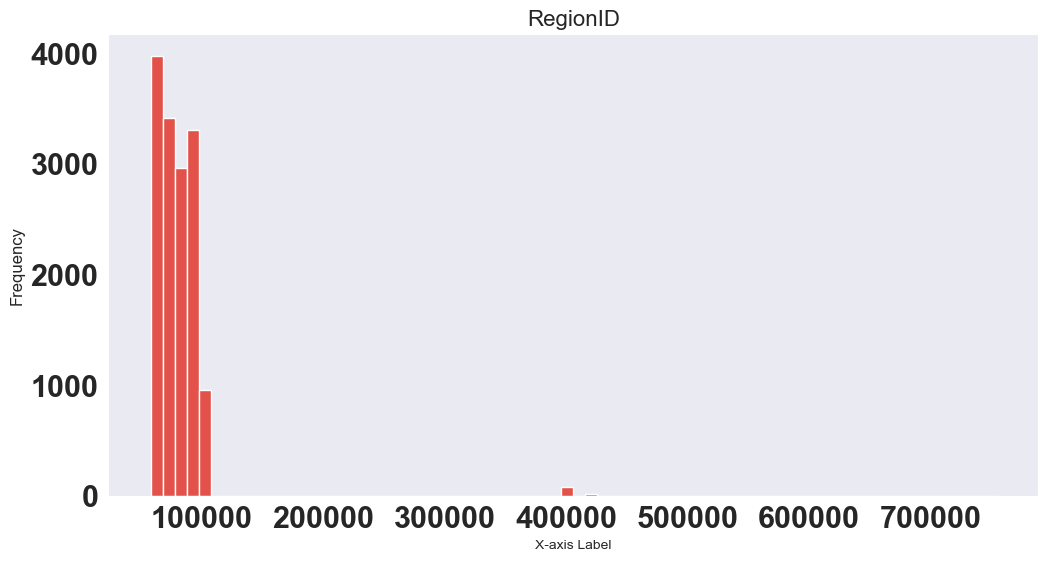

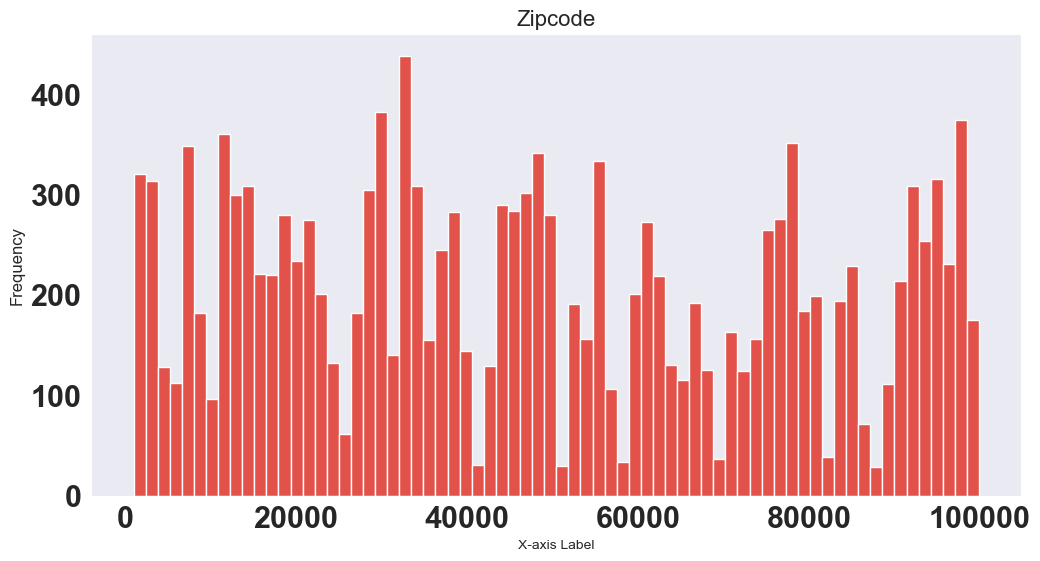

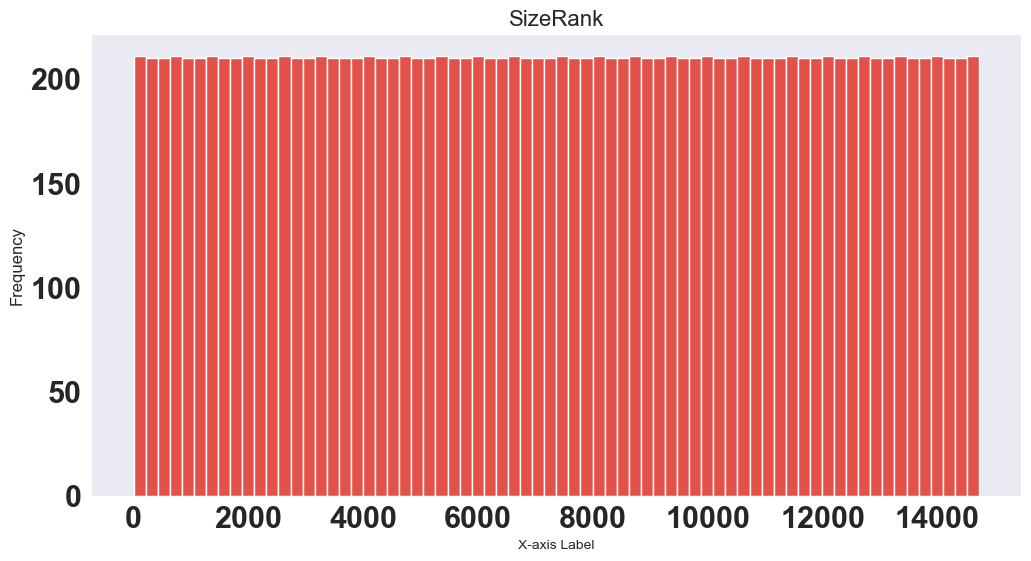

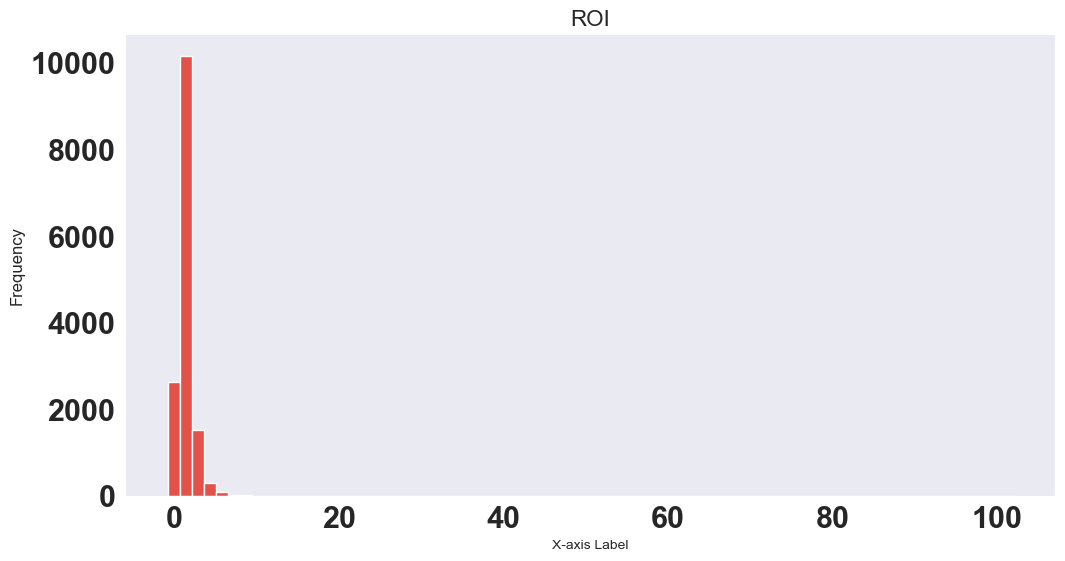

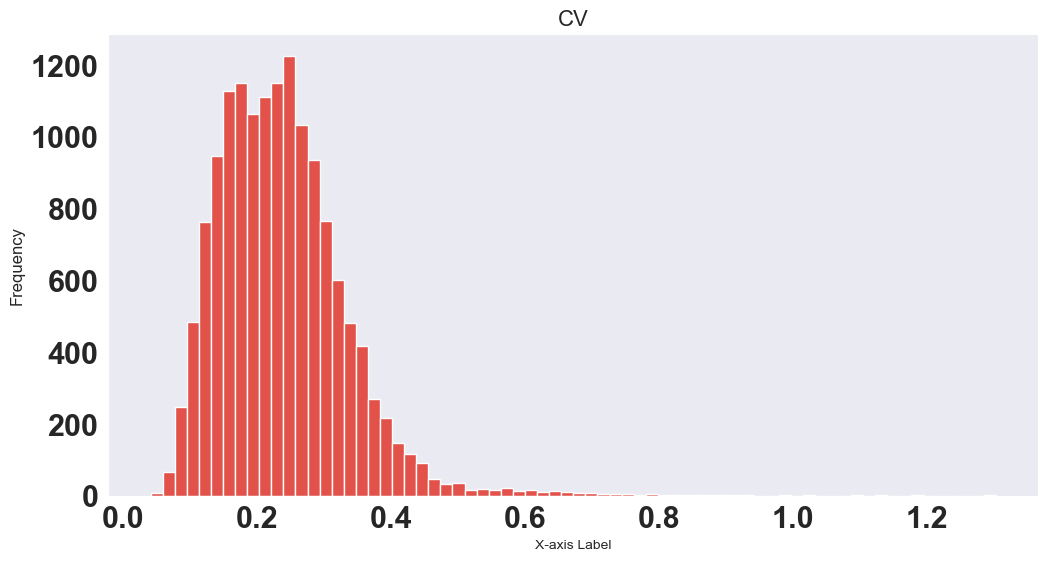

In [34]:
# Set the font size for the titles
title_fontsize = 16
tick_label_fontsize = 8 

# Loop through numeric columns and create histograms
for column in Numeric:
    plt.figure(figsize=(12, 6))  # Set the figure size
    plt.hist(eda_df[column], bins=70)
    
    # Add title and set font size
    plt.title(column, fontsize=title_fontsize)
    
    # Customize axis labels if needed
    plt.xlabel("X-axis Label", fontsize=10)
    plt.ylabel("Frequency", fontsize=12)
    # Rotate x-axis labels for better readability (optional)
    
    
    plt.grid(False)  # Add grid lines if desired
    plt.show()

In [35]:
for column in Numeric:
    eda_df[column] = pd.to_numeric(eda_df[column])

# Print the updated DataFrame
print(eda_df.head())

   RegionID  Zipcode      City State              Metro CountyName  SizeRank   
0     84654    60657   Chicago    IL            Chicago       Cook         1  \
1     90668    75070  McKinney    TX  Dallas-Fort Worth     Collin         2   
2     91982    77494      Katy    TX            Houston     Harris         3   
3     84616    60614   Chicago    IL            Chicago       Cook         4   
4     93144    79936   El Paso    TX            El Paso    El Paso         5   

        ROI        CV  
0  2.083782  0.256487  
1  0.365295  0.152680  
2  0.567966  0.143950  
3  1.623971  0.237364  
4  0.571798  0.178326  


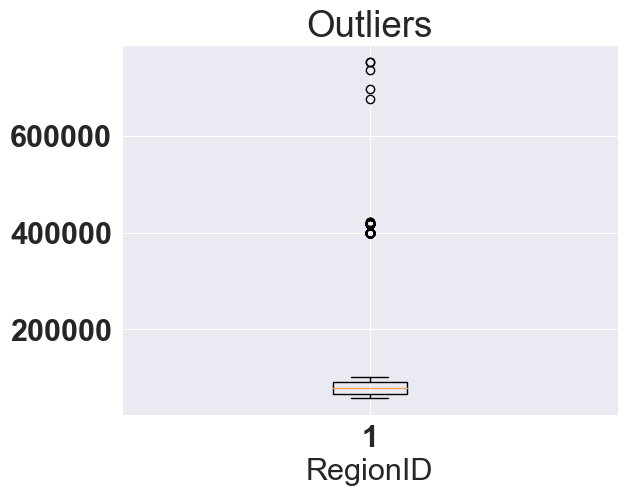

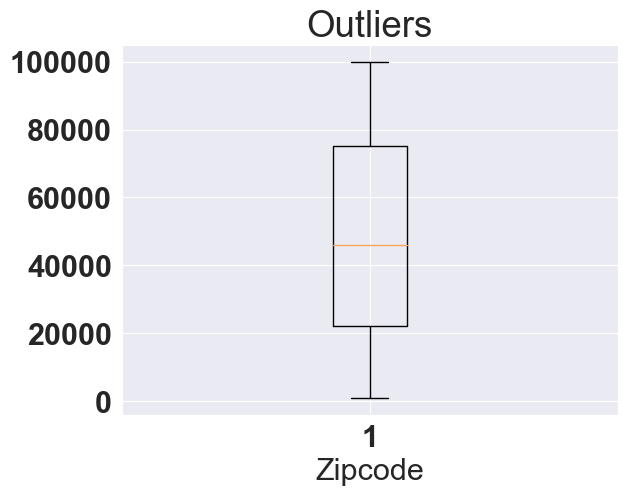

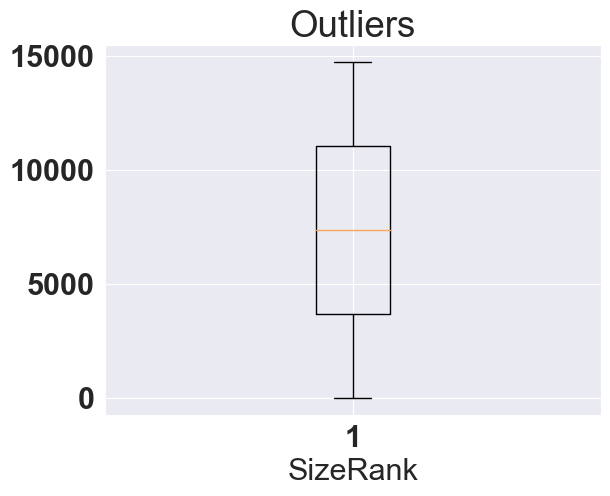

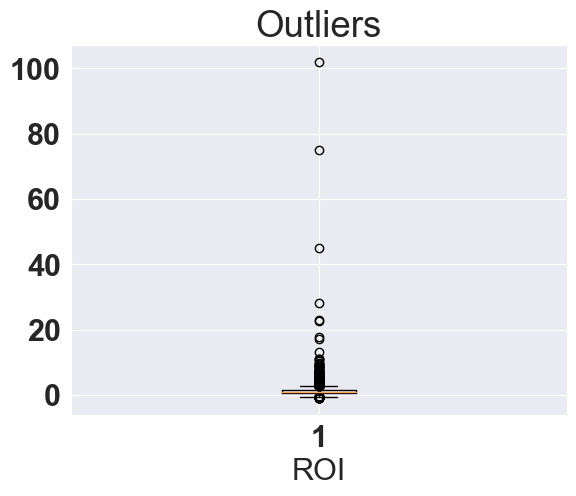

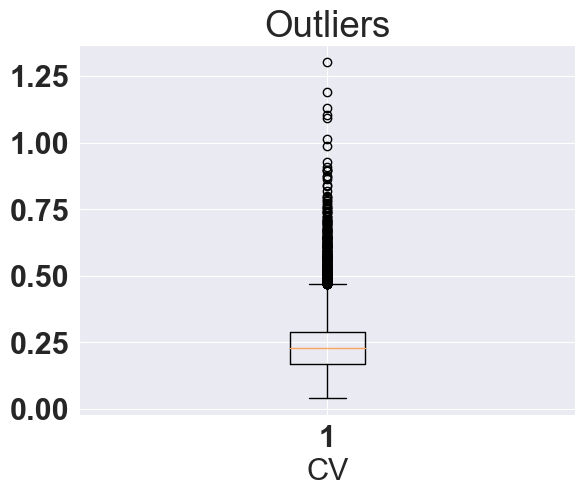

In [36]:
# Set the font size for the titles
title_fontsize = 12
tick_label_fontsize = 6

#For loop for boxplot to check for outliers
for column in Numeric:
    plt.figure()
    plt.boxplot(eda_df[column])
    plt.xlabel(column)
    plt.title('Outliers')
    
    #Display the plot
    
    plt.show()

#### 5.1.2 Categorical variables

In [37]:
#Displaying categorical data columns
categorical = eda_df[['City','State', 'Metro', 'CountyName']]
categorical.head()

,City,State,Metro,CountyName
0,Chicago,IL,Chicago,Cook
1,McKinney,TX,Dallas-Fort Worth,Collin
2,Katy,TX,Houston,Harris
3,Chicago,IL,Chicago,Cook
4,El Paso,TX,El Paso,El Paso


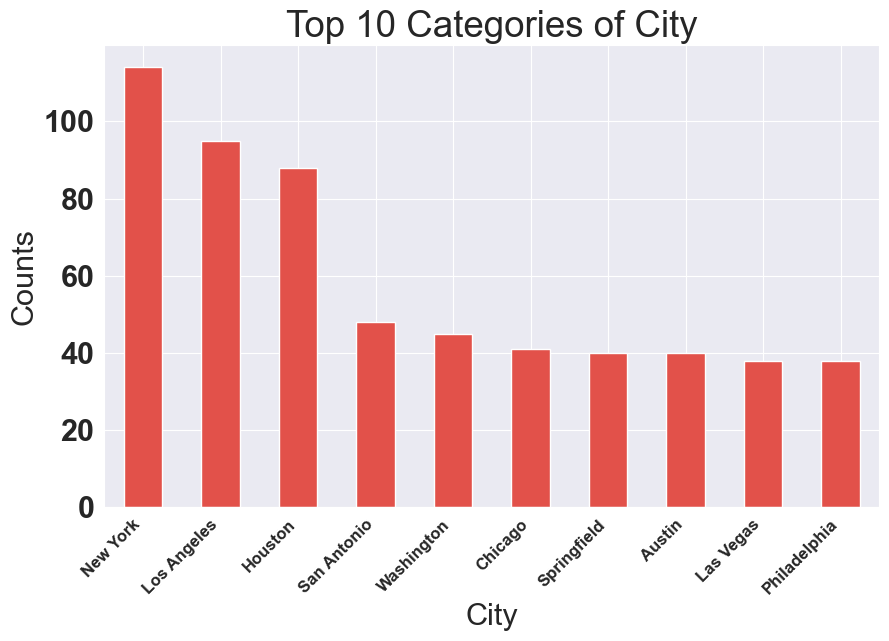

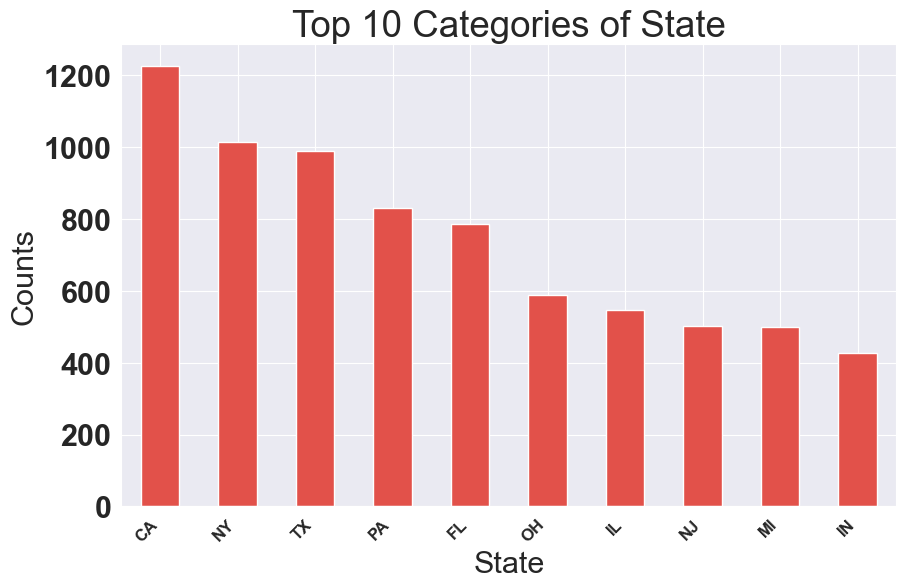

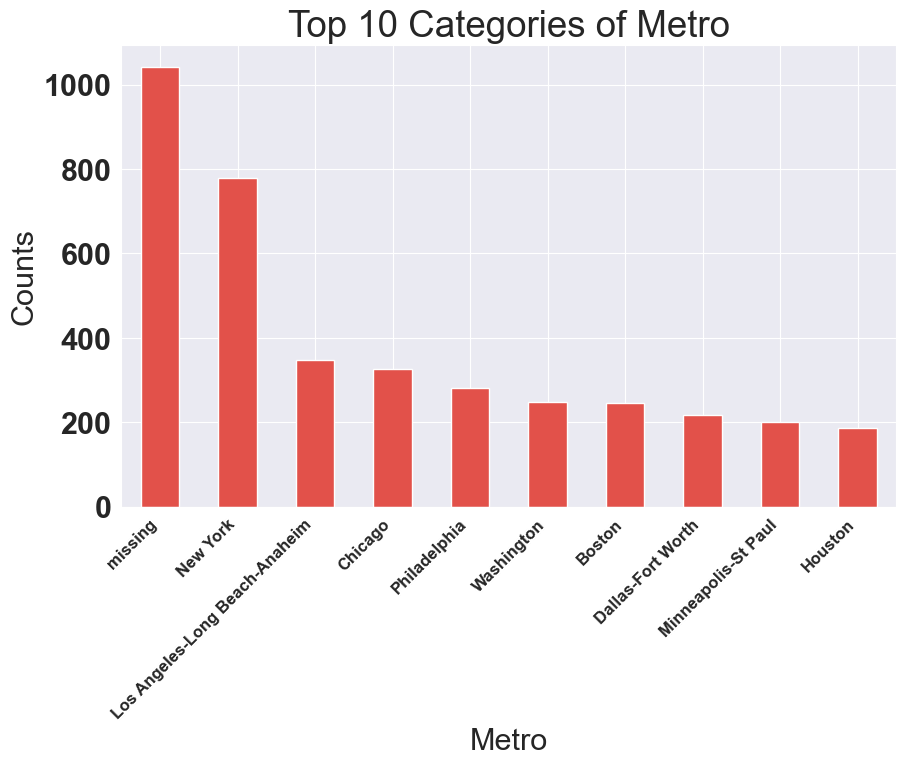

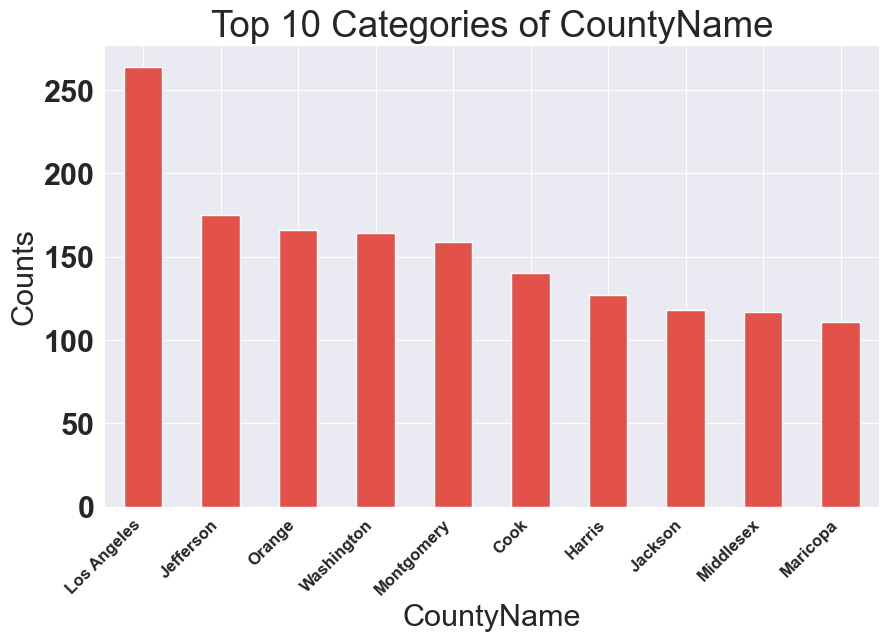

In [38]:
# Limit the number of categories to plot (e.g., top 10)
top_n = 10

for column in categorical:
    # Get the top N categories by frequency
    top_categories = eda_df[column].value_counts().head(top_n)
    
    # Create a bar plot for the top categories
    plt.figure(figsize=(10, 6))
    top_categories.plot(kind='bar')
    
    plt.title(f'Top {top_n} Categories of {column}')
    plt.xlabel(column)
    plt.ylabel('Counts')
    plt.xticks(fontsize= 12)
    # Rotate x-axis labels for better readability (optional)
    plt.xticks(rotation=45, ha='right')
    
    plt.show()


### 5.2 Bivariate Analysis

#### 5.2.1 Numeric columns

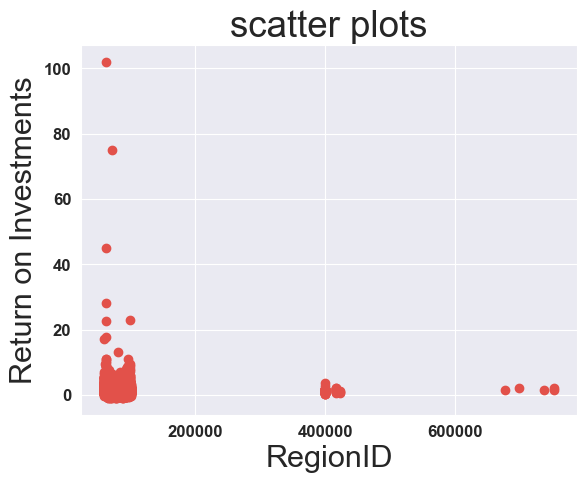

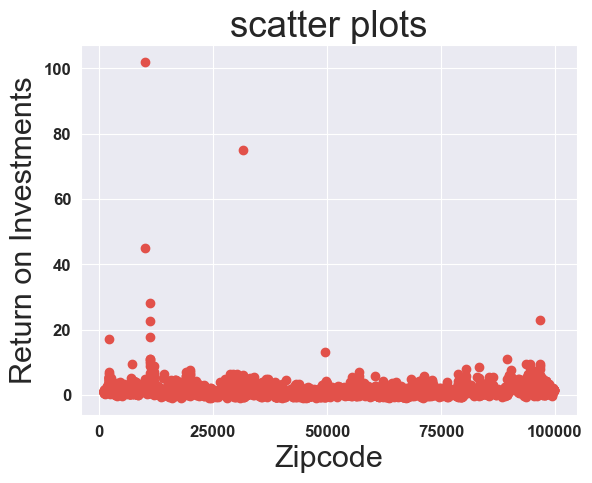

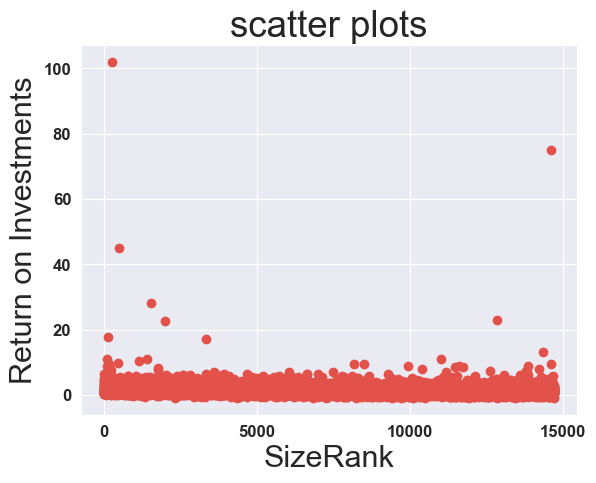

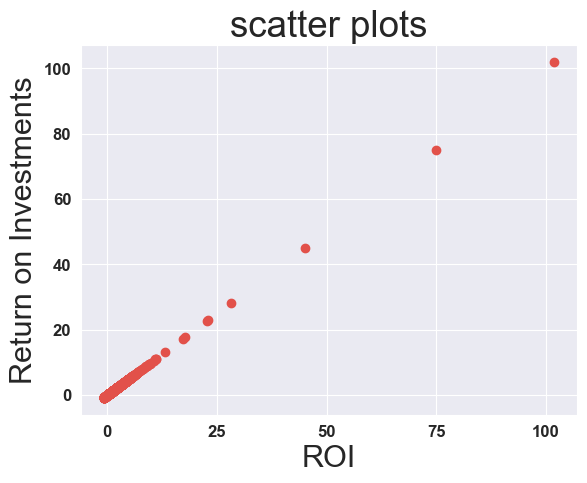

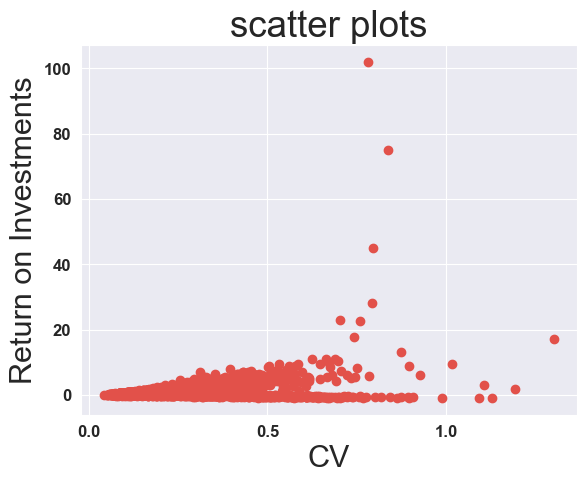

In [46]:
#Displaying scatter plot for each numeric column and the target variable
for column in Numeric:
# plot scatter plots for each item in the numeric list.    
    plt.scatter(eda_df[column], eda_df['ROI'])
# set labels and title
    plt.xlabel(column)
    plt.ylabel('Return on Investments')
    plt.title('scatter plots')
    plt.xticks(fontsize=12)
    plt.yticks(fontsize = 12)
# display the plot.
    plt.show()

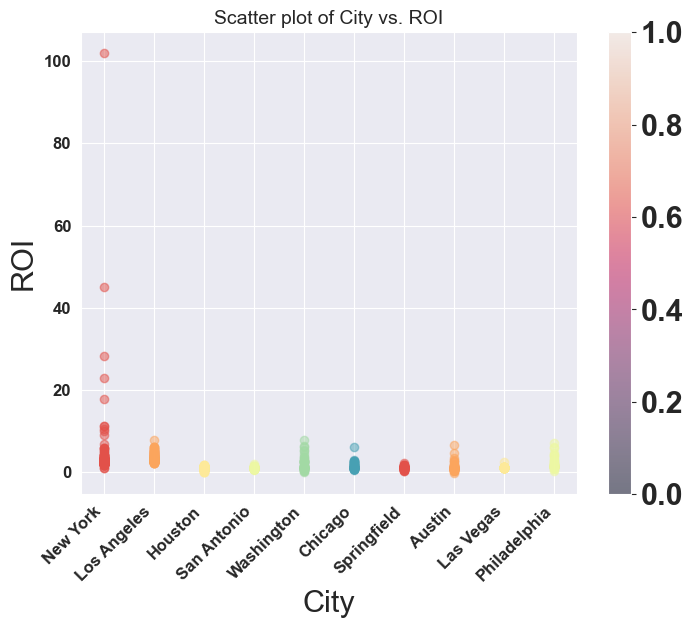

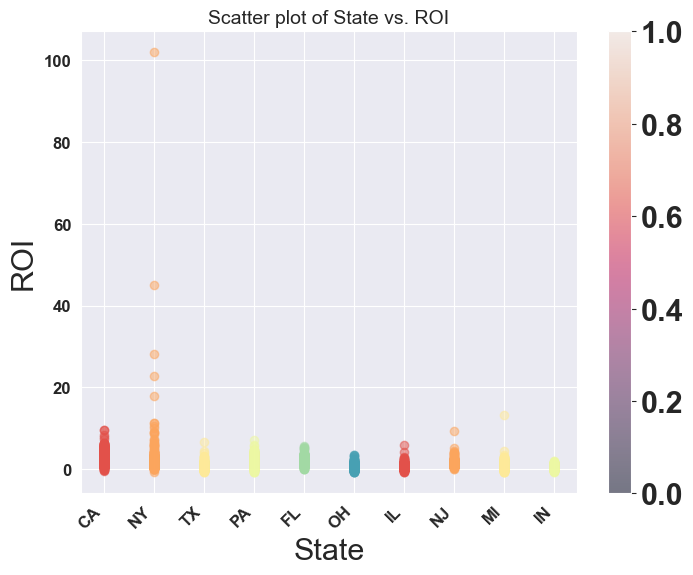

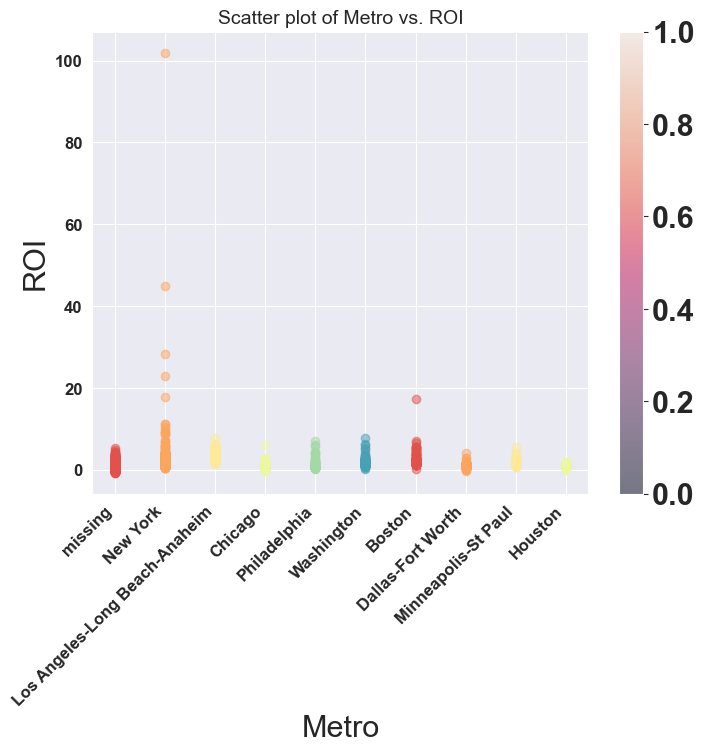

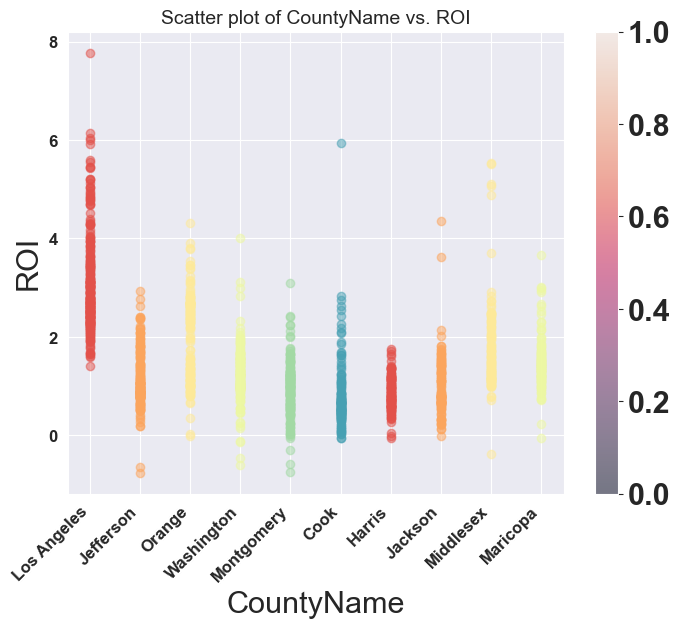

In [53]:
#Limit the number of categories to plot (e.g., top 10 categories by frequency)
top_n_categories = 10

for column in categorical:
    # Get the top N categories by frequency
    top_categories = eda_df[column].value_counts().head(top_n_categories).index
    
    plt.figure(figsize=(8, 6))  # Adjust the figure size as needed
    
    for category in top_categories:
        # Create a scatter plot for each category
        subset = eda_df[eda_df[column] == category]
        plt.scatter(subset[column], subset['ROI'], label=category, alpha=0.5)
    
    plt.title(f'Scatter plot of {column} vs. ROI', fontsize = 14)
    plt.xlabel(column)
    plt.ylabel('ROI')
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.xticks(rotation=45, ha='right')
    
    plt.colorbar()
    plt.show()

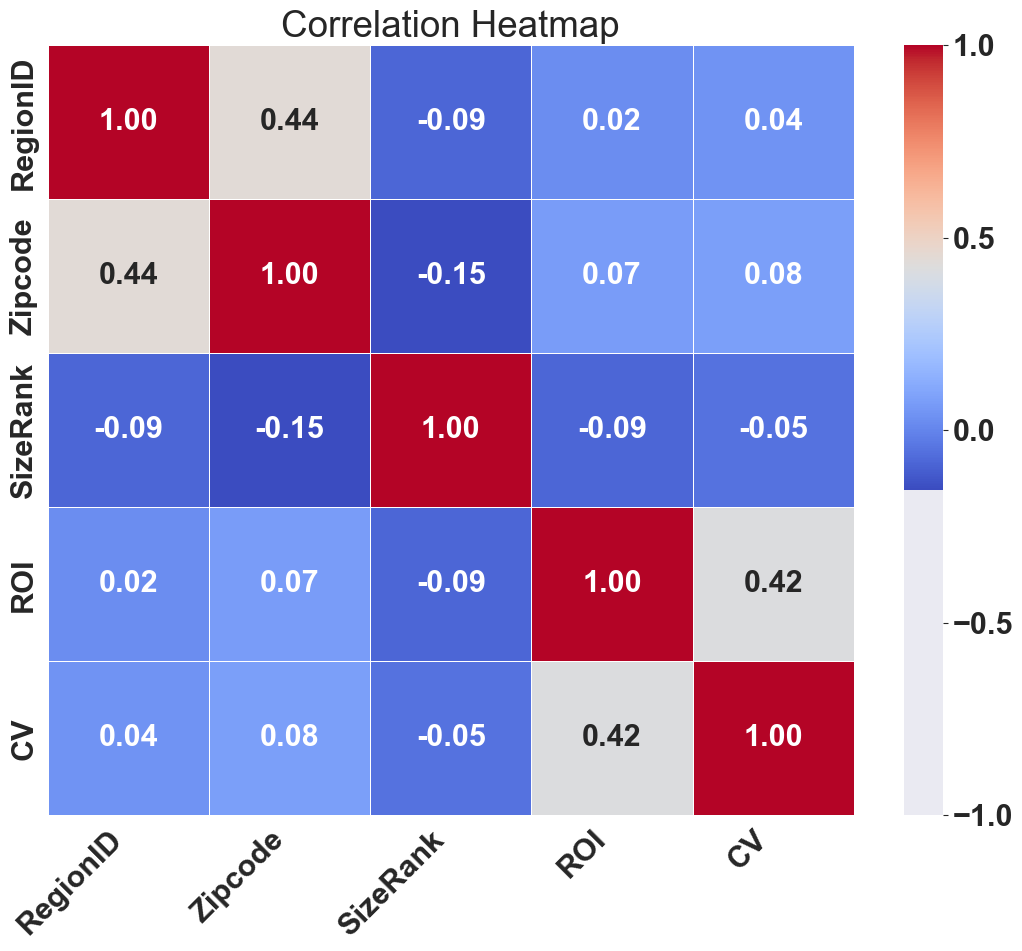

In [55]:
# Compute the correlation matrix
correlation_matrix = Numeric.corr()

# Set the figure size based on the number of variables
fig, ax = plt.subplots(figsize=(13, 10))

# Create a heatmap
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5, ax=ax)

# Rotate x-axis labels for better readability (optional)
plt.xticks(rotation=45, ha='right')

# Adjust the colorbar to fit the heatmap (optional)
cbar = ax.collections[0].colorbar
cbar.set_ticks([-1, -0.5, 0, 0.5, 1])

# Set the title for the plot
plt.title('Correlation Heatmap')

# Display the plot
plt.show()


## 6. RESHAPE FROM WIDE TO LONG FORMAT

In [ ]:
new_df = pd.melt(df.copy(), id_vars = ['RegionID', 'Zipcode', 'City', 'State', 'Metro', 'CountyName', 'SizeRank', 'ROI', 'CV'], var_name = 'Time', value_name= 'Value')
new_df

,RegionID,Zipcode,City,State,Metro,CountyName,SizeRank,ROI,CV,Time,Value
0,84654,60657,Chicago,IL,Chicago,Cook,1,2.083782,0.256487,1996-04,334200.0
1,90668,75070,McKinney,TX,Dallas-Fort Worth,Collin,2,0.365295,0.152680,1996-04,235700.0
2,91982,77494,Katy,TX,Houston,Harris,3,0.567966,0.143950,1996-04,210400.0
3,84616,60614,Chicago,IL,Chicago,Cook,4,1.623971,0.237364,1996-04,498100.0
4,93144,79936,El Paso,TX,El Paso,El Paso,5,0.571798,0.178326,1996-04,77300.0
...,...,...,...,...,...,...,...,...,...,...,...
3901590,58333,01338,Ashfield,MA,Greenfield Town,Franklin,14719,1.212474,0.232707,2018-04,209300.0
3901591,59107,03293,Woodstock,NH,Claremont,Grafton,14720,1.435814,0.303073,2018-04,225800.0
3901592,75672,40404,Berea,KY,Richmond,Madison,14721,1.336252,0.182705,2018-04,133400.0
3901593,93733,81225,Mount Crested Butte,CO,missing,Gunnison,14722,2.476714,0.282105,2018-04,664400.0


In [ ]:
 new_df['time'] = pd.to_datetime(new_df['Time'], infer_datetime_format=True)

In [ ]:
new_df = new_df.dropna(subset=['Value'])

In [ ]:
new_df

,RegionID,Zipcode,City,State,Metro,CountyName,SizeRank,ROI,CV,Time,Value,time
0,84654,60657,Chicago,IL,Chicago,Cook,1,2.083782,0.256487,1996-04,334200.0,1996-04-01
1,90668,75070,McKinney,TX,Dallas-Fort Worth,Collin,2,0.365295,0.152680,1996-04,235700.0,1996-04-01
2,91982,77494,Katy,TX,Houston,Harris,3,0.567966,0.143950,1996-04,210400.0,1996-04-01
3,84616,60614,Chicago,IL,Chicago,Cook,4,1.623971,0.237364,1996-04,498100.0,1996-04-01
4,93144,79936,El Paso,TX,El Paso,El Paso,5,0.571798,0.178326,1996-04,77300.0,1996-04-01
...,...,...,...,...,...,...,...,...,...,...,...,...
3901590,58333,01338,Ashfield,MA,Greenfield Town,Franklin,14719,1.212474,0.232707,2018-04,209300.0,2018-04-01
3901591,59107,03293,Woodstock,NH,Claremont,Grafton,14720,1.435814,0.303073,2018-04,225800.0,2018-04-01
3901592,75672,40404,Berea,KY,Richmond,Madison,14721,1.336252,0.182705,2018-04,133400.0,2018-04-01
3901593,93733,81225,Mount Crested Butte,CO,missing,Gunnison,14722,2.476714,0.282105,2018-04,664400.0,2018-04-01


In [ ]:
new_df.groupby('time').aggregate({'Value':'mean'})

,Value
time,
1996-04-01,117695.279495
1996-05-01,117817.167018
1996-06-01,117937.101813
1996-07-01,118053.847721
1996-08-01,118181.457583
...,...
2017-12-01,281095.320247
2018-01-01,282657.060382
2018-02-01,284368.688447


In [ ]:
new_df.describe()

,RegionID,SizeRank,ROI,CV,Value,time
count,3.901595e+06,3.901595e+06,3.901595e+06,3.901595e+06,3.901595e+06,3901595
mean,8.107501e+04,7.362000e+03,1.308045e+00,2.373166e-01,2.060636e+05,2007-04-01 18:12:13.584906496
min,5.819600e+04,1.000000e+00,-8.509374e-01,4.127471e-02,1.130000e+04,1996-04-01 00:00:00
25%,6.717400e+04,3.681000e+03,7.398374e-01,1.682299e-01,9.770000e+04,2001-10-01 00:00:00
50%,7.800700e+04,7.362000e+03,1.113095e+00,2.281251e-01,1.469000e+05,2007-04-01 00:00:00
75%,9.092100e+04,1.104300e+04,1.602582e+00,2.880063e-01,2.354000e+05,2012-10-01 00:00:00
max,7.538440e+05,1.472300e+04,1.019626e+02,1.303920e+00,1.931490e+07,2018-04-01 00:00:00
std,3.193304e+04,4.250165e+03,1.490562e+00,9.595088e-02,2.368017e+05,NaN


### Renaming the Value column to average_houseprice

In [ ]:
#Renaming the 'value' column to 
new_df.rename(columns = {"Value" : "average_houseprice"}, inplace=True)

In [ ]:
#Setting the 'time' column as index
new_df.set_index('time', inplace=True)

In [ ]:
#Displaying the top 5 cities with highest house prices

houseprice_topcities = pd.DataFrame(new_df.groupby("City")["average_houseprice"].mean()
                                    .sort_values(ascending=False).head(5))

In [ ]:
houseprice_topcities

,average_houseprice
City,
Atherton,3.487129e+06
Palm Beach,2.634498e+06
Snowmass Village,2.300179e+06
Portola Valley,2.131495e+06
Newport Coast,2.070006e+06


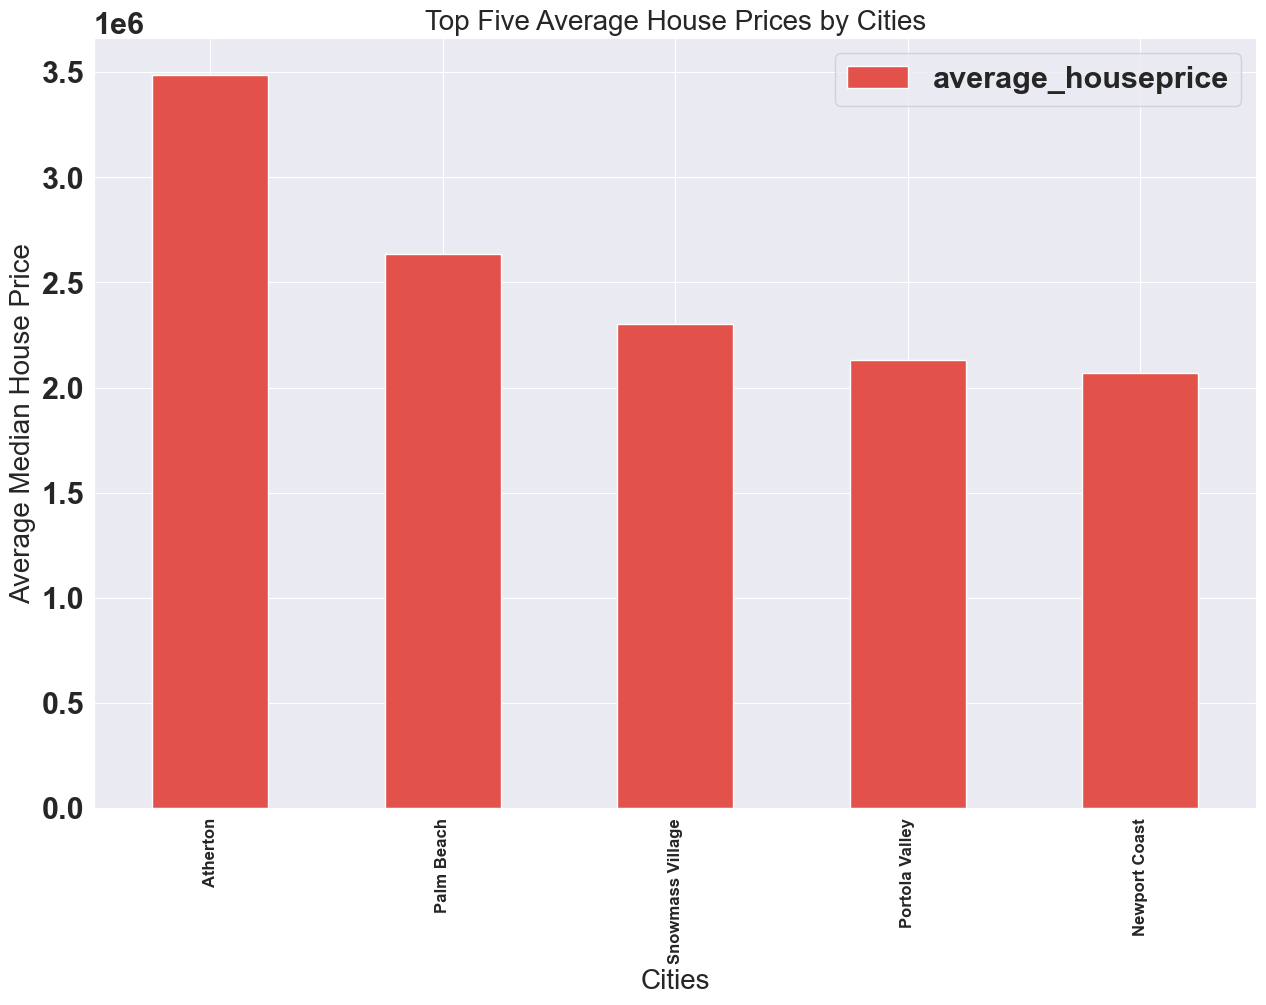

In [ ]:
ax2 = houseprice_topcities.plot(kind='bar', figsize=(15,10));
ax2.set_alpha(0.8)
ax2.set_title("Top Five Average House Prices by Cities", fontsize=20)
ax2.set_ylabel("Average Median House Price", fontsize=20);
ax2.set_xlabel("Cities", fontsize=20)
plt.xticks(fontsize= 12)
plt.savefig("output.jpg")
plt.show()

The following cities in the USA boast the highest house prices: Artheton in Carlifornia, Palm Beach in Florida, Snowmass Village in Colorado, Portola Valley in Carlifornia, and Newport Coast in Carlifornia.

In [ ]:
# grouping median house prices by size rank

urban_housevalue = pd.DataFrame(new_df.groupby("SizeRank")["average_houseprice"].mean()
                                .sort_values(ascending=False).head(5))

Text(0.5, 0, 'SizeRank')

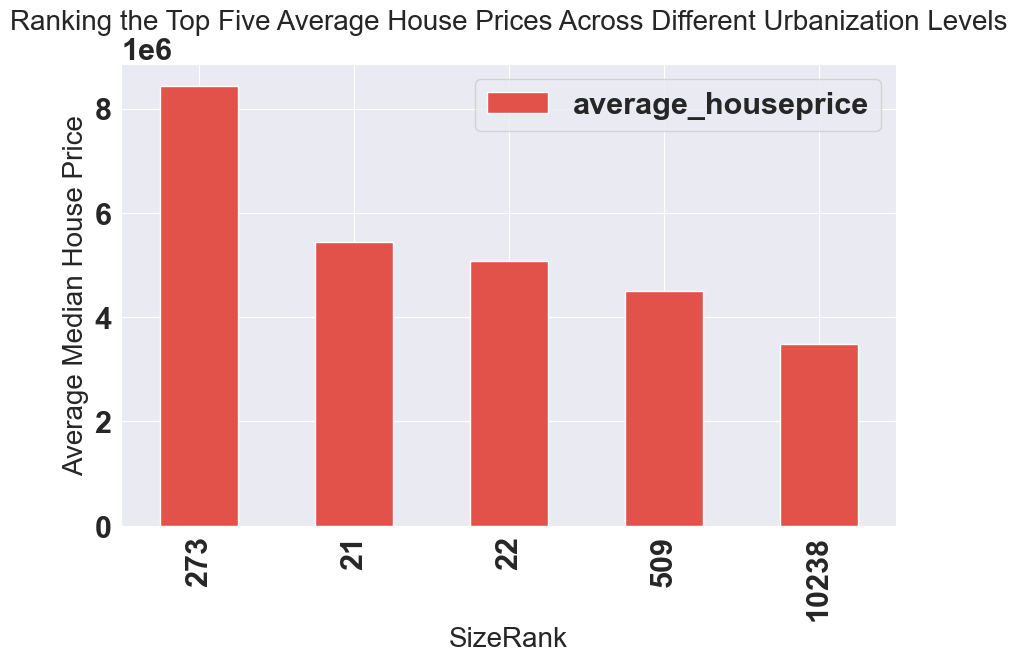

In [ ]:
ax1 = urban_housevalue.plot(kind='bar', figsize=(10,6));
ax1.set_alpha(0.8)
ax1.set_title("Ranking the Top Five Average House Prices Across Different Urbanization Levels", fontsize=20)
ax1.set_ylabel("Average Median House Price", fontsize=20);
ax1.set_xlabel("SizeRank", fontsize=20)


The Size Rank scale signifies urbanization, with 1 indicating the highest level of urbanization. Analyzing the data plot, it becomes evident that areas with high urbanization, such as Size Rank 273 (New York, New York), exhibit the highest median house prices. Additionally, Rank 21 and 22 also correspond to locations in New York. Remarkably, four out of the top five ranks belong to areas within New York state. This suggests that urbanization does not seem to significantly influence median house prices.

## 7. Time Series Modeling

In [ ]:
new_df.Zipcode

time
1996-04-01    60657
1996-04-01    75070
1996-04-01    77494
1996-04-01    60614
1996-04-01    79936
              ...  
2018-04-01    01338
2018-04-01    03293
2018-04-01    40404
2018-04-01    81225
2018-04-01    89155
Name: Zipcode, Length: 3901595, dtype: string